<a href="https://colab.research.google.com/github/enakai00/colab_rlbook/blob/master/Chapter04/02_Gambler's_Problem_Value_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[GVE-01]**

Import modules.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.size'] = 12

**[GVE-02]**

Define the Gambler class to simulate the game.

In [0]:
class Gambler:
  def __init__(self, goal=100, win_rate=0.4):
    self.goal = goal
    self.win_rate = win_rate
    self.states = range(goal+1)

    self.policy = {}  # Define later

    self.values = {}
    self.cnt = {}
    for s in self.states:
      self.values[s] = 0
      self.cnt[s] = 0

  def play(self, s, a):
    if s == 0 or s == self.goal:
      return 0, s       # Reward, Next state

    if np.random.random() < self.win_rate:  # Win
      s = min(self.goal, s + a)
      if s == self.goal:
        return 1, s    # Reward, Next state
      return 0, s      # Reward, Next state
    else:                                   # Lose
      s -= a
      if s == 0:
        return -1, s  # Reward, Next state 
      return 0, s     # Reward, Next state

**[GVE-03]**

Define a function to show the action policy and the value function.

In [0]:
def show_result(gambler):
  fig = plt.figure(figsize=(14, 4))
  linex = range(1, gambler.goal)

  subplot = fig.add_subplot(1, 2, 1)
  liney = [gambler.policy[s] for s in linex]
  subplot.plot(linex, liney)
  subplot.set_ylim([0, 100])
  subplot.set_title('Policy')

  subplot = fig.add_subplot(1, 2, 2)
  liney = [gambler.values[s] for s in linex]
  subplot.plot(linex, liney)
  subplot.set_ylim([-1, 1])
  subplot.set_title('Value')

**[GVE-04]**

Define a function to play the game for a single episode.

In [0]:
def get_episode(gambler):
  episode = []
  s = np.random.randint(1, gambler.goal)
  while True:
    a = gambler.policy[s]
    r, s_new = gambler.play(s, a)
    episode.append((s, a, r))
    if s_new == 0 or s_new == gambler.goal:
      break
    s = s_new
  return episode

**[GVE-05]**

Define a function to estimate the value function.

In [0]:
def train(gambler, num):
  c = 0
  while c < num:
    episode = get_episode(gambler)
    episode.reverse()
    total_r = 0
    for (s, a, r) in episode:
      total_r += r
      gambler.cnt[s] += 1
      gambler.values[s] += (total_r - gambler.values[s]) / gambler.cnt[s]
    c += len(episode)

**[GVE-06]**

Create a Gambler instance and initialize the action policy to alwasys bet 1.

In [0]:
gambler = Gambler()
for s in gambler.states:
  gambler.policy[s] = 1

**[GVE-07]**

Play the game for 10,000,000 times to estimate the value function.

In [0]:
%%time
train(gambler, num=10000000)

CPU times: user 14.3 s, sys: 7 ms, total: 14.4 s
Wall time: 14.5 s


**[GVE-08]**

Show the action policy and the estimated value function.

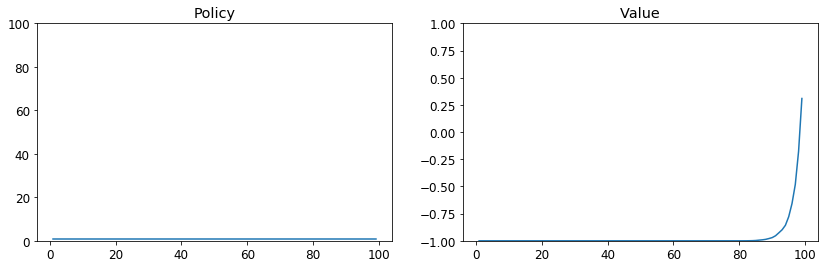

In [0]:
show_result(gambler)

**[GVE-09]**

Create a Gambler instance and initialize the action policy to bet all points.

In [0]:
gambler = Gambler()
for s in gambler.states:
  gambler.policy[s] = s

**[GVE-10]**

Play the game for 10,000,000 times to estimate the value function.

In [0]:
%%time
train(gambler, num=10000000)

CPU times: user 1min 17s, sys: 8 ms, total: 1min 17s
Wall time: 1min 17s


**[GVE-11]**

Show the action policy and the estimated value function.

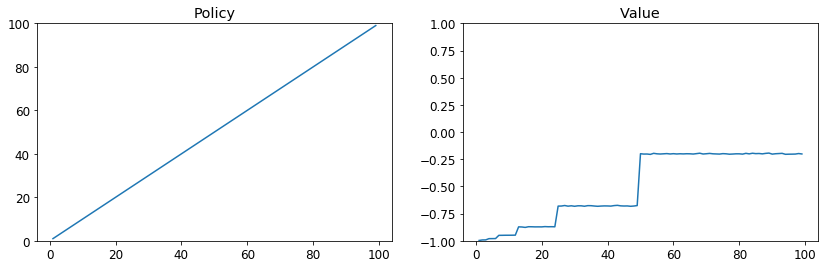

In [0]:
show_result(gambler)

**[GVE-12]**

Create a Gambler instance and initialize the action policy to bet minimum points to reach 100.

In [0]:
gambler = Gambler()
for s in gambler.states:
  gambler.policy[s] = min(s, gambler.goal-s)

**[GVE-13]**

Play the game for 10,000,000 times to estimate the value function.

In [0]:
%%time
train(gambler, num=10000000)

CPU times: user 55.2 s, sys: 9.01 ms, total: 55.2 s
Wall time: 55.6 s


**[GVE-14]**

Show the action policy and the estimated value function.

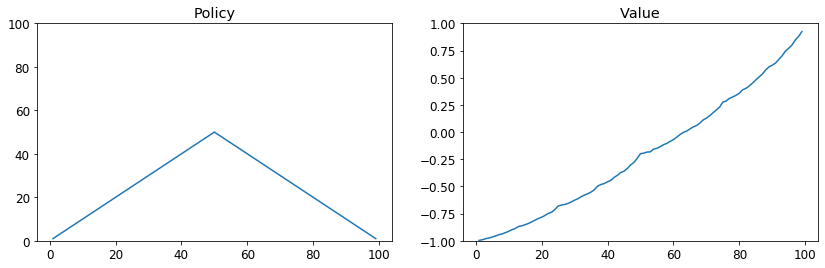

In [0]:
show_result(gambler)